# Cross validation

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

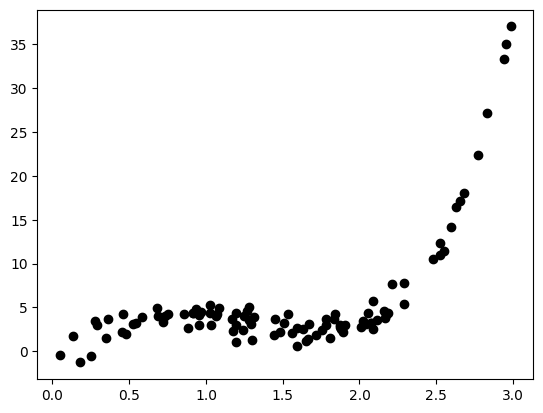

In [14]:
np.random.seed(123)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

# Przykład 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [15]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))
results = []
names = []


In [16]:
seed=123
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [17]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -3.934800 (0.593504)
PR2: -2.892805 (0.539698)
PR3: -1.044471 (0.183796)
PR4: -0.821640 (0.207924)
PR5: -0.834403 (0.207658)
PR6: -0.829825 (0.212852)
PR25: -1.201958 (0.604990)


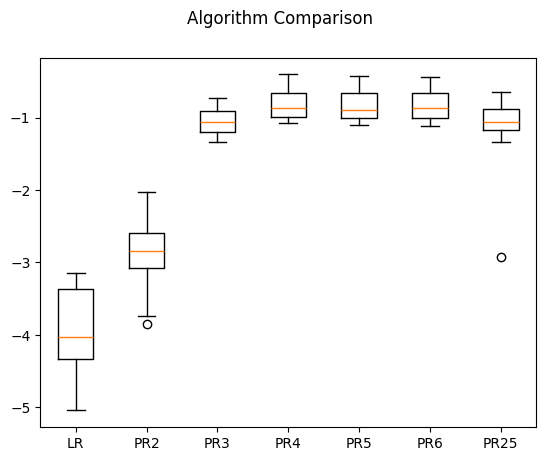

In [18]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 

In [19]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 6}

# Zadanie 
Dla danych reklamowych, obejmujących sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [20]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [21]:
results = []
names = []

for name, model in models:
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name:4}| mean: {cv_results.mean():10.4},\tstd: {cv_results.std():.4}"
    print(msg)

LR  | mean:     -1.282,	std: 0.1641
PR2 | mean:    -0.4442,	std: 0.07554
PR3 | mean:    -0.3586,	std: 0.08387
PR4 | mean:    -0.9081,	std: 1.048
PR5 | mean:     -2.309,	std: 4.861
PR6 | mean:     -2.556,	std: 3.174
PR25| mean: -5.581e+05,	std: 1.582e+06


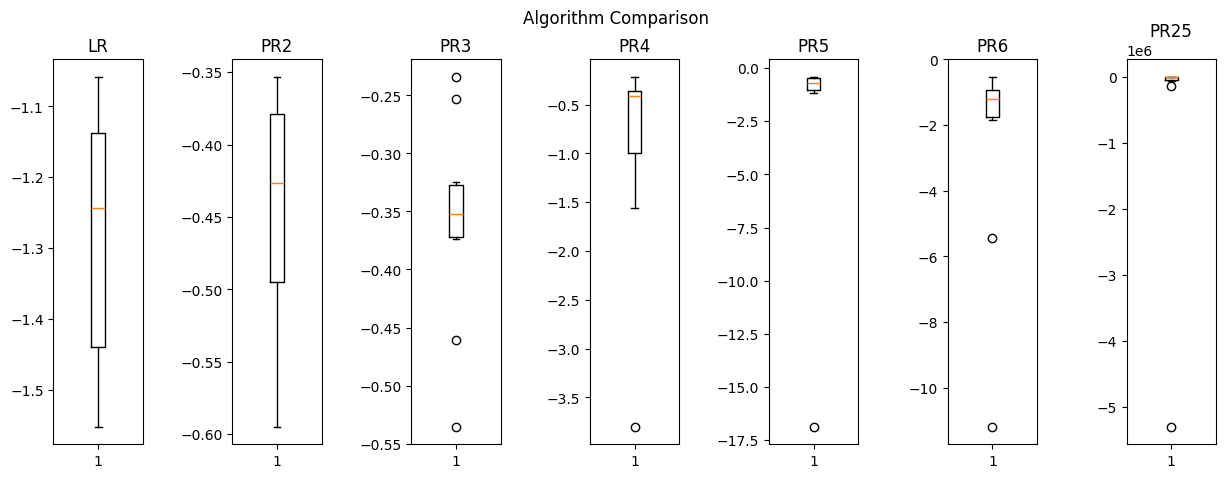

In [22]:
fig, axs = plt.subplots(1, len(results), figsize=(15, 5))
fig.suptitle('Algorithm Comparison')

for i in range(len(results)):
    axs[i].boxplot(results[i])
    axs[i].set_title(names[i])

plt.subplots_adjust(wspace=1)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [23]:
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [24]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1,2,3,4,5,6,25]},
                    cv=kfold,
                    refit=False)
grid.fit(X, y)
grid.best_params_

{'polynomialfeatures__degree': 3}